# Optimasi Pendapatan: A/B Testing dan Analisis Strategi Pemasaran


## Pendahuluan
Dalam lingkungan kerja yang dinamis di sebuah toko online besar, saya, sebagai seorang data analyst, bersama dengan tim pemasaran, telah berkolaborasi untuk mengidentifikasi potensi peningkatan pendapatan. Sebagai hasilnya, kami telah merumuskan serangkaian hipotesis yang dapat menjadi kunci untuk meningkatkan kinerja toko secara keseluruhan. Tugas utama saya dalam Project adalah melakukan pemilahan dan prioritisasi terhadap hipotesis-hipotesis tersebut. Proses ini melibatkan implementasi A/B testing yang akan membantu kami mengumpulkan data yang relevan dan signifikan. Selanjutnya, saya akan melakukan analisis mendalam terhadap hasil-hasil tersebut untuk menghasilkan wawasan yang dapat diimplementasikan guna mengoptimalkan strategi pemasaran dan meningkatkan pendapatan toko online ini. Dengan fokus pada metodologi sprint dan kolaborasi tim, Project diharapkan dapat memberikan kontribusi positif terhadap pertumbuhan dan kesuksesan toko online ini.

## Tujuan
Tujuan Project secara singkat adalah meningkatkan pendapatan toko online dengan melakukan pemilahan, prioritisasi, dan pengujian hipotesis melalui A/B testing. Melalui analisis hasil, kami berharap dapat mengidentifikasi strategi pemasaran yang efektif dan optimal untuk meningkatkan kinerja toko secara keseluruhan.

## Tahapan
Berikut tahapan-tahapan yang akan kita lakukan:

1. Memprioritaskan Hipotesis
File `hypotheses_us.csv` memuat sembilan hipotesis untuk meningkatkan pendapatan toko online dengan Reach, Impact, Confidence, dan Effort yang sudah ditentukan untuk masing-masing hipotesis.
dengan tugas yang dilakukan adalah:
- Menerapkan framework ICE untuk memprioritaskan hipotesis. Urutkan hipotesis tersebut dalam urutan prioritas menurun.
- Menerapkan framework RICE untuk memprioritaskan hipotesis. Urutkan hipotesis tersebut dalam urutan prioritas menurun.
- Menunjukkan perubahan prioritas hipotesis saat RICE diterapkan untuk menggantikan ICE. Berikan penjelasan terkait perubahan tersebut.

2. Analisis A/B Testing
Melakukan A/B testing dan mendapatkan hasil seperti yang dideskripsikan dalam file `orders_us.csv` dan `visitors_us.csv`. Berikut sub bab yang akan dilakukan:

- Gambarkan pendapatan kumulatif berdasarkan kelompok. Buat kesimpulan dan asumsinya.
- Gambarkan ukuran pesanan rata-rata kumulatif berdasarkan kelompok. Buat kesimpulan dan asumsinya.
- Gambarkan perbedaan relatif untuk ukuran pesanan rata-rata kumulatif kelompok B yang dibandingkan dengan kelompok A. Buat kesimpulan dan asumsinya.
- Gambarkan konversi kumulatif berdasarkan kelompok. Buat kesimpulan dan asumsinya.
- Gambarkan perbedaan relatif untuk tingkat konversi kumulatif kelompok B yang dibandingkan dengan kelompok A. Buat kesimpulan dan asumsinya.
- Hitung tingkat konversi setiap kelompok sebagai rasio pesanan terhadap jumlah kunjungan setiap hari. Buat grafik tingkat konversi harian dari kedua kelompok dan jelaskan perbedaannya. Buat kesimpulan dan asumsinya.
- Buat diagram tebar (scatter chart) untuk jumlah pesanan per pengguna. Buat kesimpulan dan asumsinya.
- Hitung persentil ke-95 dan ke-99 untuk jumlah pesanan per pengguna. Tentukan titik ketika suatu titik data berubah menjadi anomali.
- Buat diagram tebar (scatter chart) untuk harga pesanan. Buat kesimpulan dan asumsinya.
- Hitung persentil ke-95 dan ke-99 untuk harga pesanan. Tentukan titik ketika suatu titik data berubah menjadi anomali.
- Temukan signifikansi statistik perbedaan konversi antar kelompok menggunakan data mentah. Buat kesimpulan dan asumsinya.
- Temukan signifikansi statistik perbedaan ukuran pesanan rata-rata antar kelompok menggunakan data mentah. Buat kesimpulan dan asumsinya.
- Temukan signifikansi statistik perbedaan konversi antar kelompok menggunakan data yang telah difilter. Buat kesimpulan dan asumsinya.
- Temukan signifikansi statistik perbedaan ukuran pesanan rata-rata antar kelompok menggunakan data yang telah difilter. Buat kesimpulan dan asumsinya.
- Buatlah keputusan berdasarkan hasil pengujian. Keputusan yang memungkinkan adalah: 1. Menghentikan pengujian, serta mempertimbangkan salah satu kelompok sebagai pemimpin. 2. Menghentikan pengujian, serta menyimpulkan bahwa tidak ada perbedaan antara kedua kelompok. 3. Melanjutkan pengujian.
 

--------------

## Inisialisasi

- Import library yang akan digunakan

In [43]:
# list library yang digunakan
from scipy import stats as st
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

--------

## Memuat Data

- Memuat dataset yang diperlukan dengan variable yang akan ditentukan.


In [44]:
# Memuat datasets
hypothesis_df = pd.read_csv('/datasets/hypotheses_us.csv')
orders_df = pd.read_csv('/datasets/orders_us.csv')
visitors_df = pd.read_csv('/datasets/visitors_us.csv')

----

## Pra-pemrosesan Data

- Di sini kita akan melakuka pra-pemrosesan data terlebih dahulu apabila ada yang tidak sesuai secara nilai atau tipe data yang ada di masing-masing datasets.

### Pra-pemrosesan hypothesis_df

In [45]:
# memulai dari hypothesis_df 
# memeriksa informasi hypothesis_Df
hypothesis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 1 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Hypothesis;Reach;Impact;Confidence;Effort  9 non-null      object
dtypes: object(1)
memory usage: 200.0+ bytes


In [46]:
# memeriksa dataset hypothesis_df
hypothesis_df

,Hypothesis;Reach;Impact;Confidence;Effort
0,Add two new channels for attracting traffic. T...
1,Launch your own delivery service. This will sh...
2,Add product recommendation blocks to the store...
3,Change the category structure. This will incre...
4,Change the background color on the main page. ...
5,Add a customer review page. This will increase...
6,Show banners with current offers and sales on ...
7,Add a subscription form to all the main pages....
8,Launch a promotion that gives users discounts ...


- <font color = green> Temuan </font>

Kita akan memisahkan masing-masing category agar mudah dibaca.

In [47]:
# memisah kolom RICE untuk masing-masing nilai yang dimiliki
hypothesis_df[['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Effort']] = hypothesis_df['Hypothesis;Reach;Impact;Confidence;Effort'].str.split(';', expand=True)

# Menghapus kolom awal yang tidak terpisahkan
hypothesis_df.drop('Hypothesis;Reach;Impact;Confidence;Effort', axis=1, inplace=True)

# Mengganti nama kolom
hypothesis_df.rename(columns={'Hypothesis': 'rice_hypothesis'}, inplace=True)


In [48]:
hypothesis_df

,rice_hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


- Mari kita buat kolom-kolom tersebut menjadi lowercase

In [49]:
# Mengubah kolom menjadi lower case
hypothesis_df.columns = hypothesis_df.columns.str.lower()

In [50]:
# Muat ulang dataset
hypothesis_df

,rice_hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [51]:
# periksa kembali informasi hypothesis_df
hypothesis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   rice_hypothesis  9 non-null      object
 1   reach            9 non-null      object
 2   impact           9 non-null      object
 3   confidence       9 non-null      object
 4   effort           9 non-null      object
dtypes: object(5)
memory usage: 488.0+ bytes


- Kita harus mengubah nilai RICE menjadi integer agar bisa dihitung.

In [52]:
# Mengubah kolom-kolom tertentu menjadi tipe data integer
cols_to_convert = ['reach', 'impact', 'confidence', 'effort']
hypothesis_df[cols_to_convert] = hypothesis_df[cols_to_convert].astype(int)


In [53]:
# periksa kembali informasi hypothesis_df
hypothesis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   rice_hypothesis  9 non-null      object
 1   reach            9 non-null      int64 
 2   impact           9 non-null      int64 
 3   confidence       9 non-null      int64 
 4   effort           9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


- <font color = green> Kesimpulan Sementara </font>

Dataset hypothesis_df perlu diperbaiki agar mudah untuk melihat kondisi nilai hypothesis RICE yang dimiliki.

------

### Pra-pemrosesan orders_df

In [54]:
# Memulai dari orders_df 
# Memeriksa informasi orders_df
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


- <font color = green> Temuan </font>

Tidak ada data yang hilang untuk dataset ini. Mungkin kita akan mengubah beberapa nama kolom dan tipe data yang perlu disesuaikan.

In [55]:
# Memeriksa isi dari orders_df
orders_df

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [56]:
# mengubah nama untuk transcationid dan visitorid ke dalam bentuk penulisan snake_case
orders_df.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'}, inplace=True)

In [57]:
# mengubah tipe data date menjadi datetime
orders_df['date'] = pd.to_datetime(orders_df['date'])

In [58]:
# memeriksa ulang informasi orders_df
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   float64       
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


- Untuk tipe data kolom revenue akan kita biarkan, karena secara bawaan nilai tersebut sudah ada angka dibelakang koma.

In [59]:
# memeriksa ulang isi dari orders_df
orders_df

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


- <font color = green> Kesimpulan Sementara </font>

Untuk dataset orders_df, terdapat sedikit perubahan untuk nama kolom juga untuk tipe data yang disesuaikan.

-----

### Pra-pemrosesan visitors_df

In [60]:
# Memulai dari visitors_df 
# Memeriksa informasi visitors_df
visitors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [61]:
# memeriksa isi dari dataset visitors_df
visitors_df

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


- <font color = green> Temuan </font>

Kita akan merubah tipe data date menjadi tipe data yang sesuai.

In [62]:
# mengubah tipe data date pada dataset visitors_df
visitors_df['date'] = pd.to_datetime(visitors_df['date'])

In [63]:
# memeriksa kembali informasi pada dataset visitors_df
visitors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [64]:
# memeriksa kembali isi dari dataset visitors_df
visitors_df

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


- <font color = green> Kesimpulan Sementara </font>

Untuk visitors_df, hanya terdapat kolom `date` yang perlu diubah dengan tipe data yang sesuai.


---------

## Memprioritaskan Hipotesis

- File hypotheses_us.csv memuat sembilan hipotesis untuk meningkatkan pendapatan toko online dengan Reach, Impact, Confidence, dan Effort yang sudah ditentukan untuk masing-masing hipotesis.

### Menerapkan Framework ICE 
- Untuk memprioritaskan hipotesis. Urutkan hipotesis tersebut dalam urutan prioritas menurun.

In [65]:
# Perhitungan framework ICE

hypothesis_df['ICE'] = (hypothesis_df['impact']*hypothesis_df['confidence']) / hypothesis_df['effort']

print(hypothesis_df[['rice_hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False))

                                     rice_hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


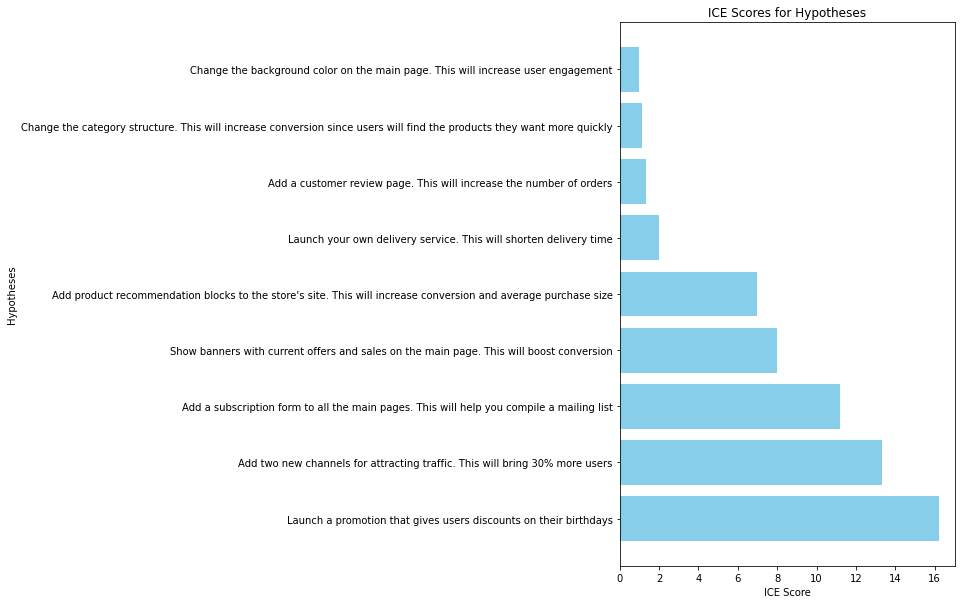

In [66]:
# Visualisasi hasil perhitungan ICE dalam prioritas menurun
hypothesis_df = hypothesis_df.sort_values(by='ICE', ascending=False)
plt.figure(figsize=(6, 10))
plt.barh(hypothesis_df['rice_hypothesis'], hypothesis_df['ICE'], color='skyblue')
plt.xlabel('ICE Score')
plt.ylabel('Hypotheses')
plt.title('ICE Scores for Hypotheses')
plt.show()

- <font color = green> Kesimpulan Sementara </font>

Berikut penerapkan Framework ICE secara menurun:

              rice_hypothesis                    ICE
- 8  Launch a promotion that gives users discounts ...  --    16.200000

- 0  Add two new channels for attracting traffic. T...  --    13.333333

- 7  Add a subscription form to all the main pages....  --    11.200000

- 6  Show banners with current offers and sales on ...  --     8.000000

- 2  Add product recommendation blocks to the store...  --     7.000000

- 1  Launch your own delivery service. This will sh...  --     2.000000

- 5  Add a customer review page. This will increase...  --     1.333333

- 3  Change the category structure. This will incre...  --     1.125000

- 4  Change the background color on the main page. ...  --     1.000000

--------

### Menerapkan Framework RICE 

- Untuk memprioritaskan hipotesis. Urutkan hipotesis tersebut dalam urutan prioritas menurun.

In [67]:
# Perhitungan framework RICE
hypothesis_df['RICE'] = (hypothesis_df['reach'] * hypothesis_df['impact'] * hypothesis_df['confidence']) / hypothesis_df['effort']

print(hypothesis_df[['rice_hypothesis', 'RICE']].sort_values(by= 'RICE', ascending = False))

                                     rice_hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


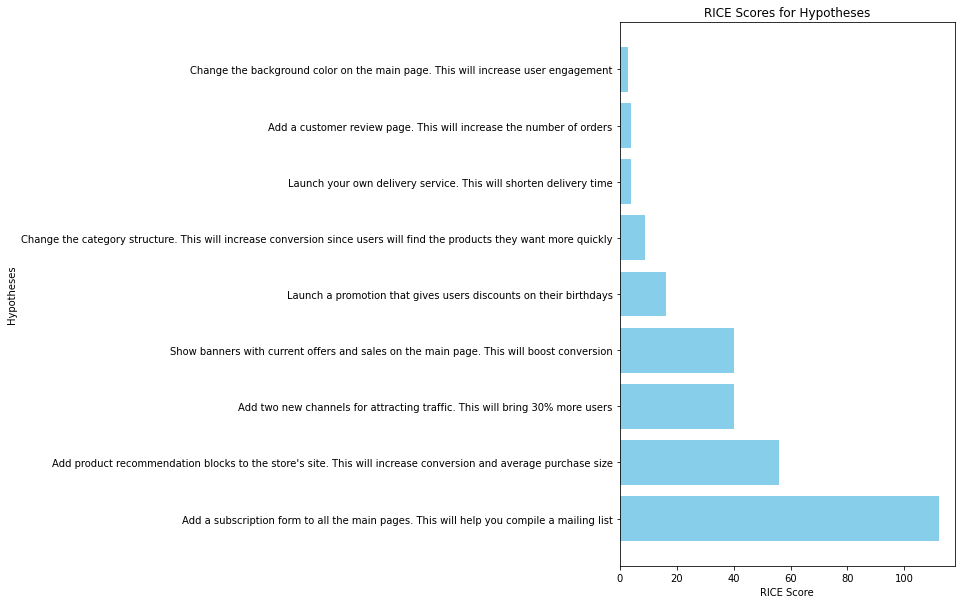

In [68]:
hypothesis_df = hypothesis_df.sort_values(by='RICE', ascending=False)
plt.figure(figsize=(6, 10))
plt.barh(hypothesis_df['rice_hypothesis'], hypothesis_df['RICE'], color='skyblue')
plt.xlabel('RICE Score')
plt.ylabel('Hypotheses')
plt.title('RICE Scores for Hypotheses')
plt.show()

- <font color = green > Kesimpulan Sementara </font>

Berikut penerapkan Framework RICE secara menurun:
                        
                        rice_hypothesis       RICE

- 7  Add a subscription form to all the main pages.... -- 112.0
- 2  Add product recommendation blocks to the store... --  56.0
- 0  Add two new channels for attracting traffic. T... --  40.0
- 6  Show banners with current offers and sales on ... --  40.0
- 8  Launch a promotion that gives users discounts ... --  16.2
- 3  Change the category structure. This will incre... --   9.0
- 1  Launch your own delivery service. This will sh... --   4.0
- 5  Add a customer review page. This will increase... --   4.0
- 4  Change the background color on the main page. ... --   3.0

------

### Menunjukkan Perubahan Prioritas Hipotesis saat RICE Diterapkan untuk Menggantikan ICE. 

- Kita akan memberikan penjelasan terkait perubahan tersebut. Perlu diingat kembali bahwa:

**RICE** terdiri atas empat komponen, yaitu:

- **Reach** (Jangkauan) — berapa banyak pengguna yang akan terpengaruh oleh pembaruan yang ingin kamu perkenalkan
- **Impact** (Dampak) — seberapa kuat pembaruan tersebut akan memengaruhi pengguna, pengalaman mereka, dan kepuasan mereka terhadap produk.
- **Confidence** (Keyakinan) — seberapa yakin kamu bahwa produkmu akan memengaruhi pengguna dengan cara yang kamu perkenalkan
- **Effort** (Usaha) — berapa biaya yang dibutuhkan untuk menguji hipotesis

- <font color = green> Kesimpulan Sementara </font>

<font color = blue>**Interpretasi Hasil ICE:** </font>

**Top 3 Prioritas (Dengan Skor Tinggi):**

- Launch a promotion that gives users discounts... (16.2): Hipotesis ini memiliki dampak dan keyakinan yang tinggi, dengan usaha yang relatif rendah.
- Add two new channels for attracting traffic... (13.33): Memiliki dampak yang cukup tinggi dengan keyakinan yang baik, dan usaha yang relatif terjangkau.
- Add a subscription form to all the main pages... (11.2): Memiliki dampak yang tinggi dengan keyakinan yang baik, dan usaha yang cukup terjangkau.


**Bottom 3 Prioritas (Dengan Skor Rendah):**

- Change the background color on the main page... (1.0): Memiliki skor rendah, mungkin karena dampak dan keyakinan yang rendah.
- Add a customer review page... (1.33): Memiliki skor yang sedikit lebih tinggi tetapi masih relatif rendah.
- Change the category structure... (1.13): Dengan skor yang rendah, mungkin karena dampak dan keyakinan yang rendah.


<font color = blue >**Interpretasi Hasil RICE**: </font>

**Top 3 Prioritas (Dengan Skor Tinggi):**

- Add a subscription form to all the main pages... (112.0): Hipotesis ini memiliki dampak, keyakinan, dan jangkauan yang tinggi, tetapi usaha yang relatif rendah.
- Add product recommendation blocks to the store... (56.0): Memiliki dampak dan jangkauan yang tinggi, dengan usaha yang relatif terjangkau.
- Add two new channels for attracting traffic... (40.0): Memiliki dampak dan jangkauan yang baik, dengan usaha yang relatif terjangkau.

**Bottom 3 Prioritas (Dengan Skor Rendah):**

- Change the background color on the main page... (3.0): Memiliki skor rendah, mungkin karena dampak dan jangkauan yang rendah.
- Launch your own delivery service... (4.0): Memiliki skor yang sedikit lebih tinggi tetapi masih relatif rendah.
- Add a customer review page... (4.0): Memiliki skor yang sama dengan hipotesis sebelumnya, mungkin karena dampak dan jangkauan yang rendah.

- Mari kita lihat ulang perbandingan dengan menyalin ulang ke bagian sub bab ini.

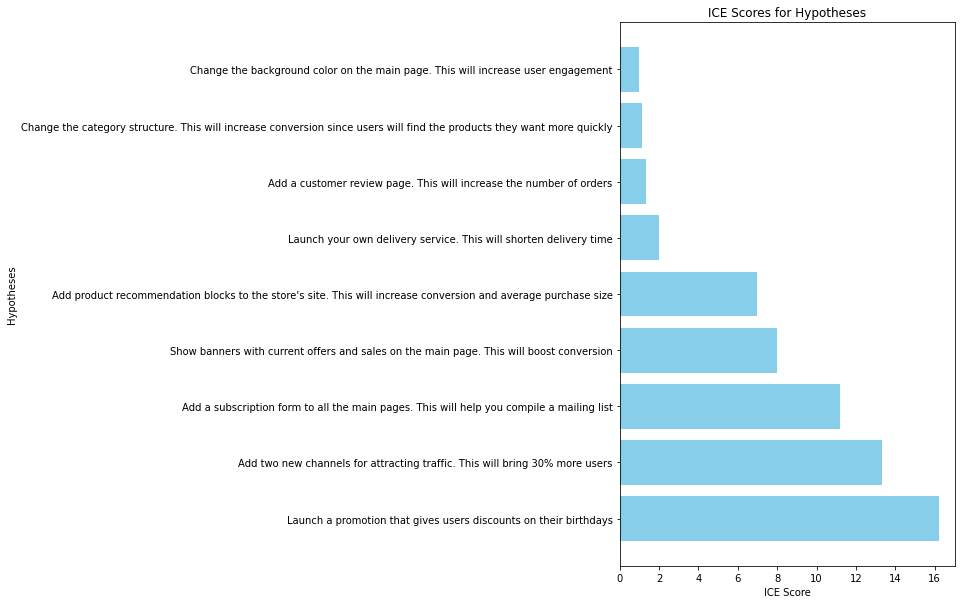

In [69]:
# Visualisasi hasil perhitungan ICE dalam prioritas menurun
hypothesis_df = hypothesis_df.sort_values(by='ICE', ascending=False)
plt.figure(figsize=(6, 10))
plt.barh(hypothesis_df['rice_hypothesis'], hypothesis_df['ICE'], color='skyblue')
plt.xlabel('ICE Score')
plt.ylabel('Hypotheses')
plt.title('ICE Scores for Hypotheses')
plt.show()

----------

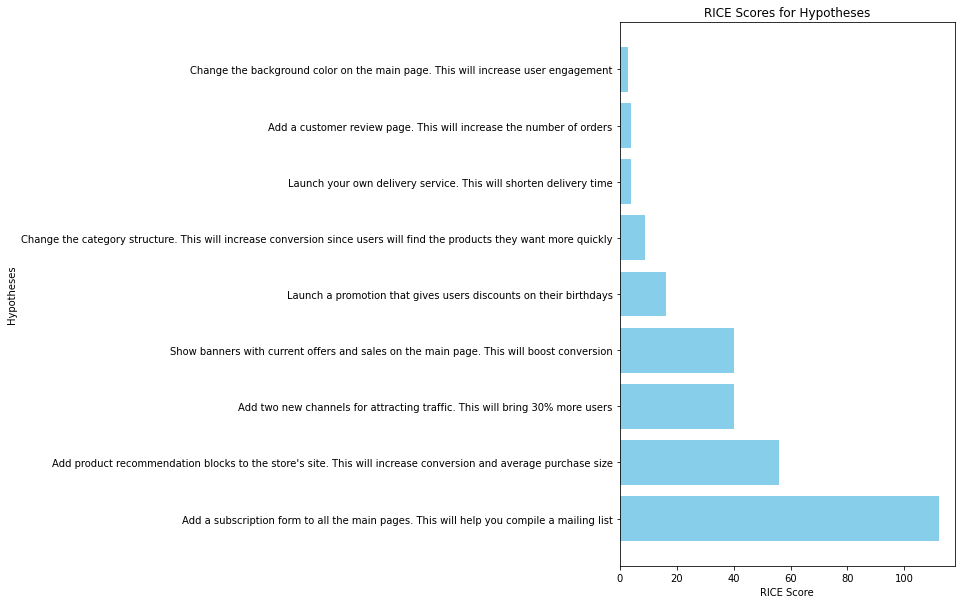

In [70]:
# Visualisasi hasil perhitungan RICE dalam prioritas menurun
hypothesis_df = hypothesis_df.sort_values(by='RICE', ascending=False)
plt.figure(figsize=(6, 10))
plt.barh(hypothesis_df['rice_hypothesis'], hypothesis_df['RICE'], color='skyblue')
plt.xlabel('RICE Score')
plt.ylabel('Hypotheses')
plt.title('RICE Scores for Hypotheses')
plt.show()

<font color = green> Kesimpulan Sementara </font>

Perbandingan:
Terdapat perubahan prioritas yang cukup signifikan antara ICE dan RICE.

- Hipotesis `Add a subscription form to all the main pages. This will help you compile a mailing list` melonjak ke posisi teratas dengan RICE karena memiliki jangkauan yang tinggi.
- Hipotesis `Launch a promotion that gives users discounts on their birthdays` tetap tinggi, tetapi peringkatnya menurun karena RICE mempertimbangkan faktor jangkauan.
- Prioritas hipotesis lainnya dapat juga mengalami perubahan, terutama jika jangkauan memainkan peran penting dalam konteks proyek atau pada strategi bisnis. 

--------

## Analisis A/B Testing

- Melakukan A/B testing dan mendapatkan hasil seperti yang dideskripsikan dalam `file orders_us.csv` dan `visitors_us.csv` atau 

`orders_df = pd.read_csv('/datasets/orders_us.csv')` dan ` visitors_df = pd.read_csv('/datasets/visitors_us.csv')`

### Gambarkan Pendapatan Kumulatif Berdasarkan Kelompok
- Membuat pendapatan kumulatif berdasarkan kelompok. Buat kesimpulan dan asumsinya.

In [71]:
# membuat variable ordersAggregated untuk menyimpan nilai kolom tertentu
datesGroups = orders_df[['date', 'group']].drop_duplicates()
ordersAggregated = datesGroups.apply(
    lambda x: orders_df[
        np.logical_and(
            orders_df['date'] <= x['date'], orders_df['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': pd.Series.nunique,
            'visitor_id': pd.Series.nunique,
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [72]:
# membuat variable visitorsAggregated untuk menyimpan nilai kolom tertentu
visitorsAggregated = datesGroups.apply(
    lambda x: visitors_df[
        np.logical_and(
            visitors_df['date'] <= x['date'], visitors_df['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visits': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

In [73]:
# menggabungkan ordersAggregated dan visitorsAggregated berdasarkan kolom 'date' dan 'group' menggunakan metode merge()
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

- Menentukan variabel cumulativeData dengan menggabungkan ordersAggregated dan visitorsAggregated berdasarkan kolom `date` dan `group` menggunakan metode merge().

In [74]:
# Memeriksa cumulativeData yang telah dibuat
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,87343.0,17708
58,2019-08-30,A,545,493,63563.5,18037
59,2019-08-30,B,620,567,90736.3,18198
60,2019-08-31,A,557,503,64554.9,18736


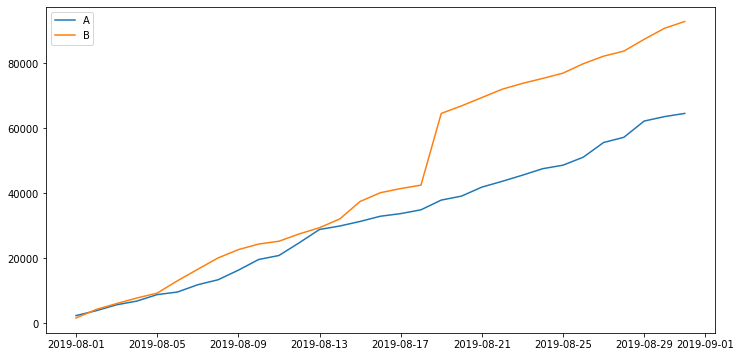

In [87]:
# buat grafik pendapatan kumulatif harian untuk tiap-tiap kelompoknya.
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Membuat grafik pendapatan kelompok A 
plt.figure(figsize=(12, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Membuat grafik pendapatan kelompok B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend() 

- Berikut visualisasi dari cumulativeRevenue A dan cumulativeRevenue B

- <font color = green> Kesimpulan Sementara </font>

Untuk segment A(cumulativeRevenueA) terlihat lebih rendah dari pada segment B(cumulativeRevenueB). Terlihat bahwa segment B lebih konsisten untuk naik dari pada segment A.

---

### Gambarkan Ukuran Pesanan Rata-Rata Kumulatif Berdasarkan Kelompok
- Mengukur pesanan rata-rata kumulatif berdasarkan kelompok. Buat kesimpulan dan asumsinya.

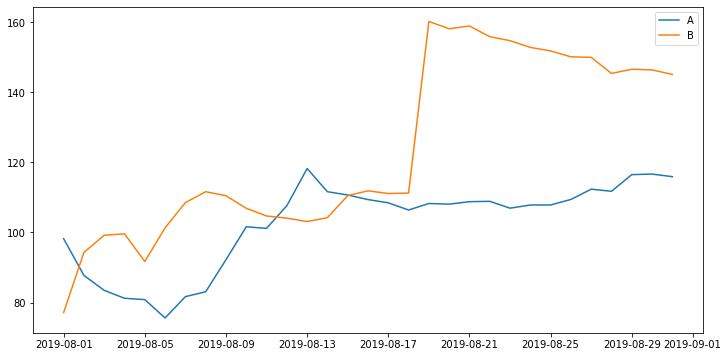

In [86]:
# Mengukur pesanan rata-rata kumulatif berdasarkan kelompok
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'revenue', 'orders']
]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'revenue', 'orders']
]

plt.figure(figsize=(12, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 

- <font color = green> Kesimpulan </font>

Rata-rata ukuran pesanan kumulatif di pertengahan terlihat segment A jauh melancip lebih unggul. Namun setelah itu mengalami penurunan drastis. Kenaikan sangat drastis setelah dari pertengahan tersebut berada segment B yaitu mengalami kenaikan yang sangat signifikan dan mengungguli segment A di setiap tanggal.

---------

### Gambarkan Perbedaan Relatif untuk Ukuran Pesanan Rata-Rata Kumulatif
- Mengelompokan B yang dibandingkan dengan kelompok A. Buat kesimpulan dan asumsinya.

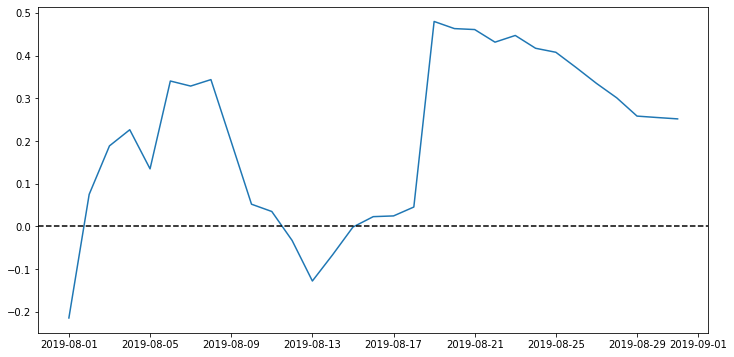

In [85]:
# mengumpulkan data menjadi satu DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# membuat grafik perbedaan relatif untuk jumlah pembelian rata-rata

plt.figure(figsize=(12, 6))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# menambahkan sumbu X
plt.axhline(y=0, color='black', linestyle='--')

- <font color = green> Kesimpulan Sementara </font>

Di beberapa titik terdapat segment yang meningkat secara drastis dan juga menurun cukup drastis. Kita belum mengetahui apakah terdapat outlier atau tidak untuk hasil yang divisualisasikan.

---------

### Gambarkan Konversi Kumulatif Berdasarkan Kelompok
- Membuat konversi kumulatif berdasarkan kelompok. Buat kesimpulan dan asumsinya.

(18109.0, 18139.0, 0.0, 0.05)

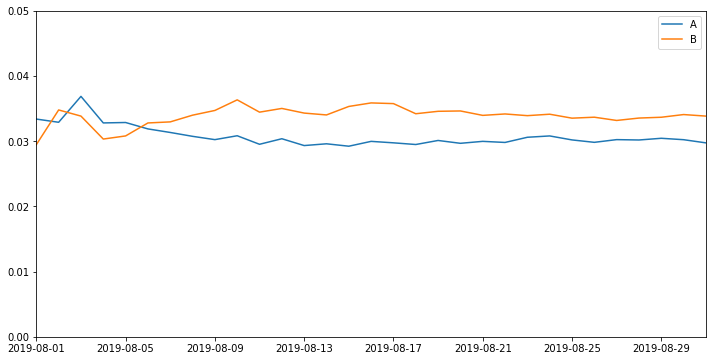

In [84]:
# menghitung konversi kumulatif
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# memilih data di kelompok A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# memilih data di kelompok B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']


# membuat grafik
plt.figure(figsize=(12, 6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# mengatur skala sumbu
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-08-31'), 0, 0.05])

- <font color = green> Kesimpulan Sementara </font>

Dari segment yang kita set harian yaitu `2019-08-01` hingga `2019-08-31`, kita bisa lihat bahwa diawal hari, segment B lebih rendah dari pada segment A. Namun peningkatan yang cukup sederhana dari segment B membuat segment tersebut cukup konsisten dan lebih tinggi dari pada segment A.

-------

### Gambarkan Perbedaan Relatif untuk Tingkat Konversi kumulatif kelompok B yang Dibandingkan dengan Kelompok A 
- Membuat perbedaan relatif untuk tingkat konversi kumulatif kelompok B yang dibandingkan dengan kelompok A. Buat kesimpulan dan asumsinya.

(18109.0, 18139.0, -0.5, 0.5)

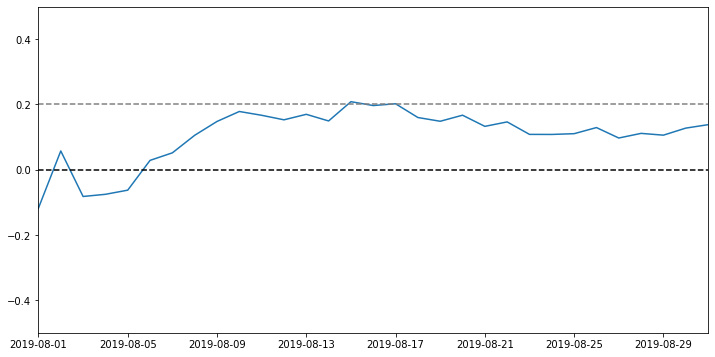

In [83]:
# Gambarkan Perbedaan Relatif untuk Tingkat Konversi kumulatif kelompok B yang Dibandingkan dengan Kelompok A
cumulativeData['conversion'] = (
    cumulativeData['orders'] / cumulativeData['visitors']
)

cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']


mergedCumulativeConversions = cumulativeDataA[['date', 'conversion']].merge(
    cumulativeDataB[['date', 'conversion']],
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B'],
)


plt.figure(figsize=(12, 6))
plt.plot(
    mergedCumulativeConversions['date'],
    mergedCumulativeConversions['conversionB']
    / mergedCumulativeConversions['conversionA']
    - 1,
)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-08-31'), -0.5, 0.5])

- <font color = green> Kesimpulan Sementara </font>

Secara konversi untuk di awal, mengalami kenaikan sedikit tinggi. Di pertengahan, segment konversi tersebut tidak lah tinggi dan tidak lah rendah.


---------

### Hitung Tingkat Konversi Setiap Kelompok Sebagai Rasio Pesanan Terhadap Jumlah Kunjungan Setiap Hari

- Buat grafik tingkat konversi harian dari kedua kelompok dan jelaskan perbedaannya. Buat kesimpulan dan asumsinya.

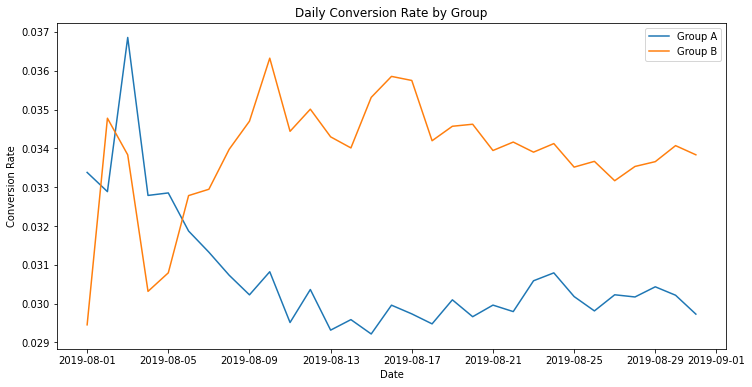

In [80]:
# Hitung rasio konversi harian
cumulativeData['daily_conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

# Pisahkan data berdasarkan kelompok A dan B
dailyConversionA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'daily_conversion']]
dailyConversionB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'daily_conversion']]

# Buat grafik tingkat konversi harian
plt.figure(figsize=(12, 6))
plt.plot(dailyConversionA['date'], dailyConversionA['daily_conversion'], label='Group A')
plt.plot(dailyConversionB['date'], dailyConversionB['daily_conversion'], label='Group B')
plt.title('Daily Conversion Rate by Group')
plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.legend()
plt.show()


- <font color = green > Kesimpulan Sementara </font>

Bisa kita lihat bahwa rasio kunjungan setiap hari pada segment A memiliki awal yang cukup tinggi namun mengalami penurunan secara drastis setiap harinya. Pada segment B mengalami kenaikan dan cukup fluktatif untuk beberapa hari di awal. Kenaikan ini cukup signifikan dan semkakin ke depan segment A tidak bisa sama sekali tidak bisa menggunguli segment B.

----

### Buat Diagram Tebar (scatter chart) Untuk Jumlah Pesanan Setiap Pengguna
- Membuat diagram scatter chart dan membuat asumsi dan kesimpulan

      visitor_id  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


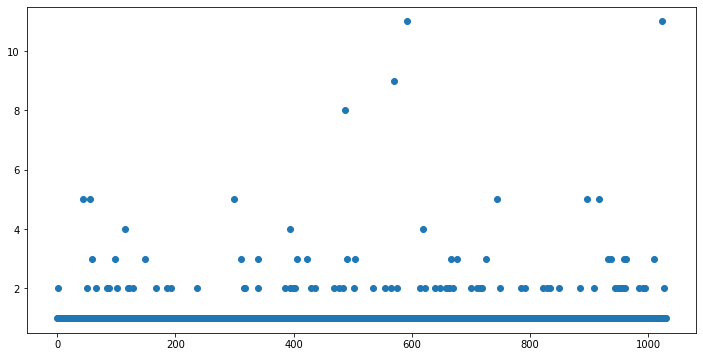

In [89]:
# Membuat diagram scatter dan jumlah order untuk melihat distribusi
ordersByUsers = (
    orders_df.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsers.columns = ['visitor_id', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

# rentang angka dari 0 hingga jumlah observasi di ordersByUsers
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(12, 6))
plt.scatter(x_values, ordersByUsers['orders'])

- <font color = green > Kesimpulan Sementara </font>

Dari scatter plot yang ditampiikan, terdapat banyak nilai outliers serta beberapa distribusi yang tidak normal. Hal ini bisa saja disebabkan oleh nilai yang anomali atau kesalahan pada input data.

--------

### Hitung Persentil ke-95 dan ke-99 untuk Jumlah Pesanan Setiap Pengguna 
- Di sini kita tentukan titik ketika suatu titik data berubah menjadi anomali.

In [91]:
# Melihat kembali distribusi yang ditampilkan sebagai pembanding
print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))
# Metode np.percentile('column', [percentile1, persentil2, persentil3]) menghitung persentil.
print(np.percentile(ordersByUsers['orders'], [95, 99]))

      visitor_id  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5
[2. 4.]


- <font color = green > Kesimpulan Sementara </font>
1. **Persentil ke-95**: Nilai 2 mungkin menunjukkan bahwa 95% dari jumlah pesanan per pengguna berada di level 2 atau kurang. Dengan kata lain, sebagian besar pengguna memiliki jumlah pesanan yang relatif rendah.

2. **Persentil ke-99**: Nilai 4 mungkin menunjukkan bahwa 99% dari jumlah pesanan per pengguna berada di level 4 atau kurang. Ini menunjukkan bahwa hanya sebagian kecil pengguna (1% teratas) yang memiliki jumlah pesanan yang lebih tinggi, dan nilai 4 dapat dianggap sebagai batas atas yang mewakili titik anomali atau nilai yang signifikan.

-------

### Buat Diagram Tebar (scatter chart) untuk Harga Pesanan
- Membuat (scatter chart) untuk harga pesanan. Buat kesimpulan dan asumsinya.

      transaction_id  visitor_id       date  revenue group
425        590470918  1920142716 2019-08-19  19920.4     B
1196      3936777065  2108080724 2019-08-15   3120.1     B
858        192721366  1316129916 2019-08-27   1450.2     A
1136       666610489  1307669133 2019-08-13   1425.8     A
744       3668308183   888512513 2019-08-27   1335.6     B
662       1811671147  4266935830 2019-08-29   1220.2     A
682       1216533772  4266935830 2019-08-29   1220.2     B
743       3603576309  4133034833 2019-08-09   1050.0     A
1103      1348774318  1164614297 2019-08-12   1025.8     A
1099       316924019   148427295 2019-08-12   1015.9     A


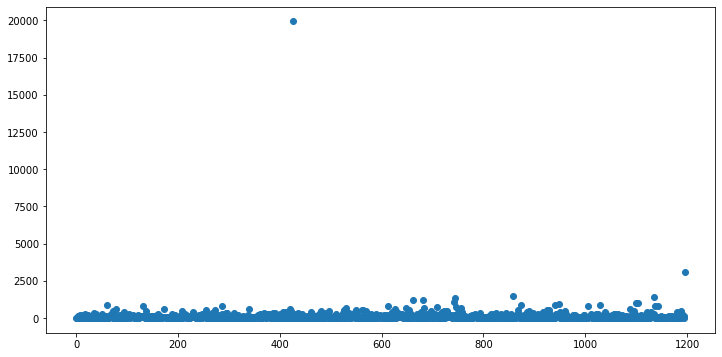

In [97]:
# Membuat diagram scatter dan jumlah order untuk melihat distribusi
print(orders_df.sort_values(by='revenue',ascending=False).head(10))
x_values = pd.Series(range(0,len(orders_df['revenue'])))

plt.figure(figsize=(12, 6))
plt.scatter(x_values, orders_df['revenue'])

- <font color = green> Kesimpulan Sementara </font>

Jumlah harga untuk scatter chart, terdapat hanya 1 yang berada di atas 2.500. Banyak yang membeli dengan harga di bawah 2.500. Serta terdapat sebuah outlier di angka 20.000

--------

### Hitung Persentil ke-95 dan ke-99 untuk Harga Pesanan 
- Tentukan titik ketika suatu titik data berubah menjadi anomali

In [98]:
# Hitung persentil sampel ke-95, dan ke-99 untuk pendapatan pesanan per pengguna 
print(orders_df.head(10))

print(np.percentile(orders_df['revenue'], [95,99]))

   transaction_id  visitor_id       date  revenue group
0      3667963787  3312258926 2019-08-15     30.4     B
1      2804400009  3642806036 2019-08-15     15.2     B
2      2961555356  4069496402 2019-08-15     10.2     A
3      3797467345  1196621759 2019-08-15    155.1     B
4      2282983706  2322279887 2019-08-15     40.5     B
5       182168103   935554773 2019-08-15     35.0     B
6       398296753  2900797465 2019-08-15     30.6     B
7      2626614568    78758296 2019-08-15     20.1     A
8      1576988021   295230930 2019-08-15    215.9     A
9      1506739906  1882260405 2019-08-15     30.5     B
[435.54  900.904]


In [99]:
# Ambang batas persentil ke-99
threshold = 900.904

# Identifikasi anomali
anomaly_data = orders_df[orders_df['revenue'] > threshold]

# Tampilkan data anomali
anomaly_data

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,19920.4,B
662,1811671147,4266935830,2019-08-29,1220.2,A
682,1216533772,4266935830,2019-08-29,1220.2,B
743,3603576309,4133034833,2019-08-09,1050.0,A
744,3668308183,888512513,2019-08-27,1335.6,B
858,192721366,1316129916,2019-08-27,1450.2,A
940,2420050534,4003628586,2019-08-08,905.8,B
949,1347999392,887908475,2019-08-21,930.0,A
1099,316924019,148427295,2019-08-12,1015.9,A
1103,1348774318,1164614297,2019-08-12,1025.8,A


<font color = green> Kesimpulan Sementara </font>

1. **Persentil ke-95**: Nilai 435.54 menunjukkan bahwa 95% dari data pendapatan pesanan per pengguna berada di bawah atau sama dengan 435.54. Dengan kata lain, sebagian besar transaksi memiliki pendapatan kurang dari 435.54.

2. **Persentil ke-99**: Nilai 900.904 menunjukkan bahwa 99% dari data pendapatan pesanan per pengguna berada di bawah atau sama dengan 900.904. Ini menunjukkan bahwa sebagian besar transaksi, 99% dari total, memiliki pendapatan kurang dari 900.904.

3. Bisa dipastikan dengan batas ke-99. terdapat beberapa nilai anomali.

----------------

### Temukan Signifikansi Statistik Perbedaan Konversi antar Kelompok Menggunakan Data Mentah
- Menentukan signifikansi statistik perbedaan konversi antar kelompok menggunakan data mentah. Buat kesimpulan dan asumsinya.

In [100]:
# Menentukan signifikansi statistik perbedaan konversi antar kelompok
ordersByUsersA = orders_df[orders_df['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersA.columns = ['visitor_id', 'orders_A']

ordersByUsersB = orders_df[orders_df['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersB.columns = ['visitor_id', 'orders_B']

In [102]:
# Membuat masing-masing sample untuk melihat perbandingan signifikansi
sampleA = pd.concat(
    [
        ordersByUsersA['orders_A'],
        pd.Series(
            0,
            index=np.arange(
                visitors_df[visitors_df['group'] == 'A']['visits'].sum()
                - len(ordersByUsersA['orders_A'])
            ),
            name='orders_A',
        ),
    ],
    axis=0,
)
sampleB = pd.concat(
    [
        ordersByUsersB['orders_B'],
        pd.Series(
            0,
            index=np.arange(
                visitors_df[visitors_df['group'] == 'B']['visits'].sum()
                - len(ordersByUsersB['orders_B'])
            ),
            name='orders_B',
        ),
    ],
    axis=0,
)

In [105]:
# Hitung signifikansi statistik dari perbedaan konversi dengan menerapkan pengujian Mann-Whitney. 
print('{0:.5f}'.format(st.mannwhitneyu(sampleA, sampleB)[1]))
print('{0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

0.01679
0.138


- <font color = green> Kesimpulan Sementara </font>

Nilai p kurang dari tingkat signifikansi umum 0.05, yang menunjukkan bahwa terdapat perbedaan signifikan antara sampleA dan sampleB. Dalam konteks pengujian Mann-Whitney, ini dapat diartikan sebagai adanya perbedaan yang signifikan dalam distribusi antara dua kelompok.

------

### Temukan Signifikansi Statistik Perbedaan Ukuran Pesanan Rata-Rata antar Kelompok Menggunakan Data Mentah
- Mencari signifikansi statistik perbedaan ukuran pesanan rata-rata antar kelompok menggunakan data mentah. Buat kesimpulan dan asumsinya.

In [107]:
# Mencari statistik perbedaan ukuran pesanan rata-rata antar kelompok menggunakan data mentah
print('{0:.3f}'.format(st.mannwhitneyu(orders_df[orders_df['group']=='A']['revenue'], orders_df[orders_df['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders_df[orders_df['group']=='B']['revenue'].mean()/orders_df[orders_df['group']=='A']['revenue'].mean()-1))

0.692
0.252


- <font color = green > Kesimpulan Sementara </font>

Nilai P lebih besar dari 0.05 pada umumnya. Ini menunjukan bahwa tidak ada perbedaan secara signifikan secara statistik untuk ukuran pesanan rata-rata antar kelompok dengan menggunakan data mentah.

----------

### Temukan Signifikansi Statistik Perbedaan Konversi antar Kelompok Menggunakan Data yang Telah Difilter
- Menemukan signifikansi statistik perbedaan konversi antar kelompok menggunakan data yang telah difilter. Buat kesimpulan dan asumsinya.

In [109]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders_A'] > 2]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders_B'] > 2]['visitor_id'],
    ],
    axis=0,
)

usersWithExpensiveOrders = orders_df[orders_df['revenue'] > 10000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)


In [112]:
# Membuat data mentah yang akan difilter
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))]['orders_A'],pd.Series(0, index=np.arange(visitors_df[visitors_df['group']=='A']['visits'].sum() - len(ordersByUsersA['orders_A'])),name='orders_A')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))]['orders_B'],pd.Series(0, index=np.arange(visitors_df[visitors_df['group']=='B']['visits'].sum() - len(ordersByUsersB['orders_B'])),name='orders_B')],axis=0)



In [114]:
print("{0:.5f}".format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.01254
0.168


- <font color = green > Kesimpulan Sementara </font>

Nilai p kurang dari tingkat signifikansi umum 0.05, yang menunjukkan bahwa terdapat perbedaan yang signifikan dalam distribusi antara kelompok A dan B setelah menghapus pengguna yang dianggap abnormal.

--------

### Temukan Signifikansi Statistik Serbedaan Ukuran Pesanan Rata-Rata antar Kelompok Menggunakan Data yang Telah Difilter.
- Menemukan signifikansi statistik perbedaan ukuran pesanan rata-rata antar kelompok menggunakan data yang telah difilter. Buat kesimpulan dan asumsinya.

In [120]:
# Menemukan signifikansi statistik perbedaan ukuran pesanan rata-rata antar kelompok menggunakan data yang telah difilter
print(abnormalUsers.head(5))

print('{0:.3f}'.format(st.mannwhitneyu(
    orders_df[np.logical_and(
        orders_df['group']=='A',
        np.logical_not(orders_df['visitor_id'].isin(abnormalUsers)))]['revenue'],
    orders_df[np.logical_and(
        orders_df['group']=='B',
        np.logical_not(orders_df['visitor_id'].isin(abnormalUsers)))]['revenue'])[1]))

print('{0:.3f}'.format(
    orders_df[np.logical_and(orders_df['group']=='B',np.logical_not(orders_df['visitor_id'].isin(abnormalUsers)))]['revenue'].mean()/
    orders_df[np.logical_and(
        orders_df['group']=='A',
        np.logical_not(orders_df['visitor_id'].isin(abnormalUsers)))]['revenue'].mean() - 1))

18    199603092
23    237748145
37    249864742
68    457167155
68    611059232
Name: visitor_id, dtype: int64
0.670
-0.055


- <font color = green> Kesimpulan Sementara </font>

Nilai p `0.67` lebih besar dari tingkat signifikansi umum `0.05`, yang menunjukkan bahwa tidak ada perbedaan signifikan dalam ukuran pesanan rata-rata antara kelompok A dan B setelah menghapus pengguna yang dianggap abnormal. Nilai `-0.055` menunjukkan bahwa kelompok B memiliki ukuran pesanan rata-rata sekitar 5.5% lebih rendah daripada kelompok A setelah menghilangkan pengguna yang dianggap abnormal.

--------

### **Keputusan Berdasarkan Hasil Pengujian**

**Perbedaan Konversi Menggunakan Data yang Diurut dari Sub Bab (1.8.11 hingga 1.8.14):**

1. **Perbedaan Konversi Menggunakan Data Mentah:**
- Nilai p: 0.01679
- Perbandingan rata-rata: 0.138
- Keputusan: Terdapat perbedaan yang signifikan dalam konversi antara kelompok A dan B.
- Perbedaan Ukuran Pesanan Rata-Rata Menggunakan Data Mentah

2. **Perbedaan Ukuran Pesanan Rata-Rata Menggunakan Data Mentah:**
- Nilai p: 0.692
- Perbandingan rata-rata: 0.252
- Keputusan: Tidak terdapat perbedaan yang signifikan dalam ukuran pesanan rata-rata antara kelompok A dan B.

3. **Perbedaan Konversi Menggunakan Data yang Telah Difilter:**
- Nilai p: 0.01254
- Perbandingan rata-rata: 0.168
- Keputusan: Terdapat perbedaan yang signifikan dalam konversi antara kelompok A dan B setelah menghapus pengguna yang dianggap abnormal.

4. **Perbedaan Ukuran Pesanan Rata-Rata Menggunakan Data yang Telah Difilter:**
- Nilai p: 0.670
- Perbandingan rata-rata: -0.055
- Keputusan: Tidak terdapat perbedaan yang signifikan dalam ukuran pesanan rata-rata antara kelompok A dan B setelah menghapus - pengguna yang dianggap abnormal.

===============================================================================================================================

<font color = red> **Keputusan yang diambil** </font>

`Menghentikan pengujian, serta mempertimbangkan salah satu kelompok sebagai pemimpin`

------

# **Kesimpulan Umum**

- Dataset hypothesis_df perlu diperbaiki agar mudah untuk melihat kondisi nilai hypothesis RICE yang dimiliki
- Untuk dataset orders_df, terdapat sedikit perubahan untuk nama kolom juga untuk tipe data yang disesuaikan.
- Untuk visitors_df, hanya terdapat kolom date yang perlu diubah dengan tipe data yang sesuai.

===============================================================================================================================
    **Berikut penerapkan Framework ICE secara menurun:**

          rice_hypothesis                       ICE
1) 8 Launch a promotion that gives users discounts ... -- 16.200000

2) 0 Add two new channels for attracting traffic. T... -- 13.333333

3) 7 Add a subscription form to all the main pages.... -- 11.200000

4) 6 Show banners with current offers and sales on ... -- 8.000000

5) 2 Add product recommendation blocks to the store... -- 7.000000

6) 1 Launch your own delivery service. This will sh... -- 2.000000

7) Add a customer review page. This will increase... -- 1.333333

8) 3 Change the category structure. This will incre... -- 1.125000

9) 4 Change the background color on the main page. ... -- 1.000000

===============================================================================================================================
     **Berikut penerapkan Framework RICE secara menurun:**
               
               rice_hypothesis               RICE
1) 7 Add a subscription form to all the main pages.... -- 112.0

2) 2 Add product recommendation blocks to the store... -- 56.0

3) 0 Add two new channels for attracting traffic. T... -- 40.0

4) 6 Show banners with current offers and sales on ... -- 40.0

5) 8 Launch a promotion that gives users discounts ... -- 16.2

6) 3 Change the category structure. This will incre... -- 9.0

7) 1 Launch your own delivery service. This will sh... -- 4.0

8) 5 Add a customer review page. This will increase... -- 4.0

9) 4 Change the background color on the main page. ... -- 3.0

===============================================================================================================================


**Top 3 Prioritas (Dengan Skor Tinggi):**

- Launch a promotion that gives users discounts... (16.2): Hipotesis ini memiliki dampak dan keyakinan yang tinggi, dengan usaha yang relatif rendah.
- Add two new channels for attracting traffic... (13.33): Memiliki dampak yang cukup tinggi dengan keyakinan yang baik, dan usaha yang relatif terjangkau.
- Add a subscription form to all the main pages... (11.2): Memiliki dampak yang tinggi dengan keyakinan yang baik, dan usaha yang cukup terjangkau.


**Bottom 3 Prioritas (Dengan Skor Rendah):**

- Change the background color on the main page... (1.0): Memiliki skor rendah, mungkin karena dampak dan keyakinan yang rendah.
- Add a customer review page... (1.33): Memiliki skor yang sedikit lebih tinggi tetapi masih relatif rendah.
- Change the category structure... (1.13): Dengan skor yang rendah, mungkin karena dampak dan keyakinan yang rendah.


<font color = blue >**Interpretasi Hasil RICE**: </font>

**Top 3 Prioritas (Dengan Skor Tinggi):**

- Add a subscription form to all the main pages... (112.0): Hipotesis ini memiliki dampak, keyakinan, dan jangkauan yang tinggi, tetapi usaha yang relatif rendah.
- Add product recommendation blocks to the store... (56.0): Memiliki dampak dan jangkauan yang tinggi, dengan usaha yang relatif terjangkau.
- Add two new channels for attracting traffic... (40.0): Memiliki dampak dan jangkauan yang baik, dengan usaha yang relatif terjangkau.

**Bottom 3 Prioritas (Dengan Skor Rendah):**

- Change the background color on the main page... (3.0): Memiliki skor rendah, mungkin karena dampak dan jangkauan yang rendah.
- Launch your own delivery service... (4.0): Memiliki skor yang sedikit lebih tinggi tetapi masih relatif rendah.
- Add a customer review page... (4.0): Memiliki skor yang sama dengan hipotesis sebelumnya, mungkin karena dampak dan jangkauan yang rendah.

===============================================================================================================================

**Perbandingan:
Terdapat perubahan prioritas yang cukup signifikan antara ICE dan RICE.**

- Hipotesis `Add a subscription form to all the main pages. This will help you compile a mailing list` melonjak ke posisi teratas dengan RICE karena memiliki jangkauan yang tinggi.
- Hipotesis `Launch a promotion that gives users discounts on their birthdays` tetap tinggi, tetapi peringkatnya menurun karena RICE mempertimbangkan faktor jangkauan.
- Prioritas hipotesis lainnya dapat juga mengalami perubahan, terutama jika jangkauan memainkan peran penting dalam konteks proyek atau pada strategi bisnis. 

===============================================================================================================================

- Untuk segment A(cumulativeRevenueA) terlihat lebih rendah dari pada segment B(cumulativeRevenueB). Terlihat bahwa segment B lebih konsisten untuk naik dari pada segment A.
- Di beberapa titik terdapat segment yang meningkat secara drastis dan juga menurun cukup drastis. Kita belum mengetahui apakah terdapat outlier atau tidak untuk hasil yang divisualisasikan.
- Dari segment yang kita set harian yaitu `2019-08-01` hingga `2019-08-31`, kita bisa lihat bahwa diawal hari, segment B lebih rendah dari pada segment A. Namun peningkatan yang cukup sederhana dari segment B membuat segment tersebut cukup konsisten dan lebih tinggi dari pada segment A.
- Secara konversi untuk di awal, mengalami kenaikan sedikit tinggi. Di pertengahan, segment konversi tersebut tidak lah tinggi dan tidak lah rendah.
- Bisa kita lihat bahwa rasio kunjungan setiap hari pada segment A memiliki awal yang cukup tinggi namun mengalami penurunan secara drastis setiap harinya. Pada segment B mengalami kenaikan dan cukup fluktatif untuk beberapa hari di awal. Kenaikan ini cukup signifikan dan semkakin ke depan segment A tidak bisa sama sekali tidak bisa menggunguli segment B.
- Dari scatter plot yang ditampiikan, terdapat banyak nilai outliers serta beberapa distribusi yang tidak normal. Hal ini bisa saja disebabkan oleh nilai yang anomali atau kesalahan pada input data.

===============================================================================================================================
**Bagian: Hitung Persentil ke-95 dan ke-99 untuk Jumlah Pesanan Setiap Pengguna**
1. **Persentil ke-95**: Nilai 2 mungkin menunjukkan bahwa 95% dari jumlah pesanan per pengguna berada di level 2 atau kurang. Dengan kata lain, sebagian besar pengguna memiliki jumlah pesanan yang relatif rendah.

2. **Persentil ke-99**: Nilai 4 mungkin menunjukkan bahwa 99% dari jumlah pesanan per pengguna berada di level 4 atau kurang. Ini menunjukkan bahwa hanya sebagian kecil pengguna (1% teratas) yang memiliki jumlah pesanan yang lebih tinggi, dan nilai 4 dapat dianggap sebagai batas atas yang mewakili titik anomali atau nilai yang signifikan.

===============================================================================================================================

- Jumlah harga untuk scatter chart, terdapat hanya 1 yang berada di atas 2.500. Banyak yang membeli dengan harga di bawah 2.500. Serta terdapat sebuah outlier di angka 20.000

===============================================================================================================================
**Bagian: Hitung Persentil ke-95 dan ke-99 untuk Harga Pesanan**
1. **Persentil ke-95**: Nilai 435.54 menunjukkan bahwa 95% dari data pendapatan pesanan per pengguna berada di bawah atau sama dengan 435.54. Dengan kata lain, sebagian besar transaksi memiliki pendapatan kurang dari 435.54.

2. **Persentil ke-99**: Nilai 900.904 menunjukkan bahwa 99% dari data pendapatan pesanan per pengguna berada di bawah atau sama dengan 900.904. Ini menunjukkan bahwa sebagian besar transaksi, 99% dari total, memiliki pendapatan kurang dari 900.904.

3. Bisa dipastikan dengan batas ke-99. terdapat beberapa nilai anomali.

===============================================================================================================================

**Untuk: Temukan Signifikansi Statistik Perbedaan Konversi antar Kelompok Menggunakan Data Mentah**
- Nilai p kurang dari tingkat signifikansi umum 0.05, yang menunjukkan bahwa terdapat perbedaan signifikan antara sampleA dan sampleB. Dalam konteks pengujian Mann-Whitney, ini dapat diartikan sebagai adanya perbedaan yang signifikan dalam distribusi antara dua kelompok.

**Untuk: Temukan Signifikansi Statistik Perbedaan Ukuran Pesanan Rata-Rata antar Kelompok Menggunakan Data Mentah**
- Nilai P lebih besar dari 0.05 pada umumnya. Ini menunjukan bahwa tidak ada perbedaan secara signifikan secara statistik untuk ukuran pesanan rata-rata antar kelompok dengan menggunakan data mentah.

**Untuk: Temukan Signifikansi Statistik Perbedaan Konversi antar Kelompok Menggunakan Data yang Telah Difilter**
- Nilai p kurang dari tingkat signifikansi umum 0.05, yang menunjukkan bahwa terdapat perbedaan yang signifikan dalam distribusi antara kelompok A dan B setelah menghapus pengguna yang dianggap abnormal.

**Untuk: Temukan Signifikansi Statistik Serbedaan Ukuran Pesanan Rata-Rata antar Kelompok Menggunakan Data yang Telah Difilter**
- Nilai p `0.67` lebih besar dari tingkat signifikansi umum `0.05`, yang menunjukkan bahwa tidak ada perbedaan signifikan dalam ukuran pesanan rata-rata antara kelompok A dan B setelah menghapus pengguna yang dianggap abnormal. Nilai `-0.055` menunjukkan bahwa kelompok B memiliki ukuran pesanan rata-rata sekitar 5.5% lebih rendah daripada kelompok A setelah menghilangkan pengguna yang dianggap abnormal.

===============================================================================================================================
**Insight Analysis**

Berdasarkan hasil analisis yang telah dilakukan, beberapa insight yang dapat diambil dari eksperimen ini dapat mencakup:


**1. Perbedaan Konversi:**
- Terdapat perbedaan signifikan dalam tingkat konversi antara kelompok A dan B setelah menghapus pengguna yang dianggap abnormal. Hal ini dapat menjadi insight penting, terutama jika konversi dianggap sebagai metrik kunci atau tujuan utama dari eksperimen ini.

**2. Ukuran Pesanan Rata-Rata:**
- Tidak terdapat perbedaan yang signifikan dalam ukuran pesanan rata-rata antara kelompok A dan B setelah menghapus pengguna yang dianggap abnormal. Meskipun terdapat perbedaan arah, nilai p yang tinggi menunjukkan bahwa perbedaan ini mungkin terjadi secara kebetulan.

**3. Pengaruh Pengguna Abnormal:**
- Pembersihan data dari pengguna abnormal dapat memengaruhi hasil eksperimen. Ini menggarisbawahi pentingnya identifikasi dan penanganan outlier atau anomali dalam analisis data.

**4. Pertimbangan Bisnis:**
- Keputusan akhir harus didasarkan pada pertimbangan bisnis secara menyeluruh. Jika konversi dianggap sebagai faktor kunci dalam keputusan bisnis, hasil yang menunjukkan perbedaan yang signifikan dapat menjadi dasar untuk mengambil keputusan.

**5. Pertimbangan Lebih Lanjut:**
- Analisis ini dapat menjadi titik awal untuk pertimbangan lebih lanjut. Misalnya, eksplorasi lebih lanjut terhadap segmentasi pengguna atau analisis cohort dapat memberikan wawasan tambahan.

**6. Sumber Daya dan Efisiensi:**
- Pertimbangkan efisiensi sumber daya. Jika perbedaan yang signifikan telah ditemukan dan menghentikan pengujian memberikan nilai tambah yang signifikan, hal ini dapat dianggap sebagai keputusan yang efisien.

**Kesimpulan:**

- Eksperimen ini memberikan wawasan terkait konversi, dan keputusan selanjutnya harus disesuaikan dengan konteks bisnis dan tujuan eksperimen.
- Selalu disarankan untuk berkolaborasi dengan tim dan pemangku kepentingan terkait dalam membuat keputusan bisnis berdasarkan hasil analisis.
- Sumber daya, tujuan eksperimen, dan konteks bisnis harus menjadi pemandu utama dalam merumuskan kesimpulan dan mengambil tindakan selanjutnya.